In [1]:
import warnings
warnings.filterwarnings('ignore')
import stemgraphic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pylab
import numpy as np
import missingno as msno

In [2]:
df = pd.read_csv(r'C:\Users\Namiq\Desktop\diamonds.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
cut_num = df['cut'].value_counts()
cut_num

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [4]:
df.shape

(53940, 10)

## Data check and cleaning

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<AxesSubplot:>

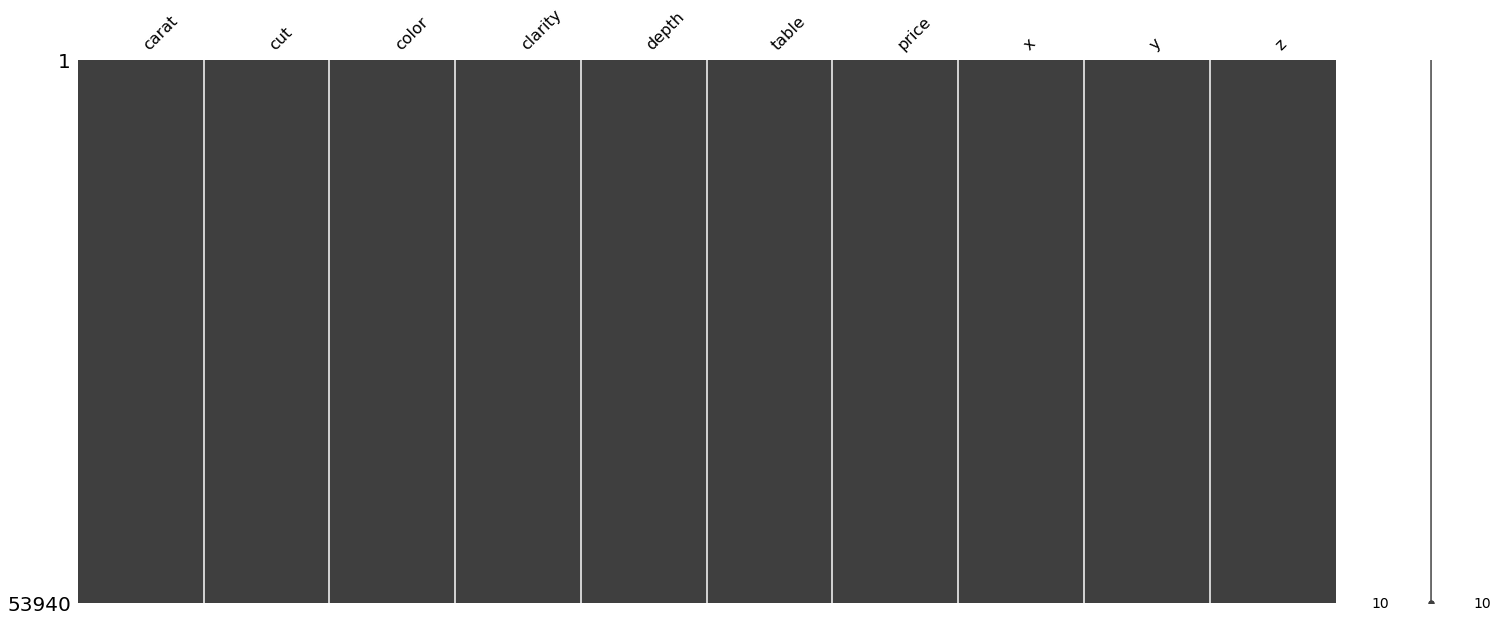

In [7]:
msno.matrix(df)

Burada datanı yüklədikdən sonra Miisingno Library vasitəsilə məlumat boşluqlarının olmadığına əmin ola bilərik.
daha sonra isə describe ilə sütunlar haqqında ümumi məlumat alaq

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Gördüyünüz kimi burada x y və z sütunları üçün min dəyər 0 olaraq göstərilib. 
yəni hər hansı bir almazın ölçüləri sıfır ola bilməyəcəyinə görəbunları silməy ən optimal seçimdir.

PS: bunu internetdə bu datanın edilmiş analizində gördüm və mənədə məntiqli gəldiyi üçün tətbiq etmək istədim. 

In [9]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [10]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

In [11]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [12]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Distribution of columns and correlation

x y və z sütunlarının hər hansı birində sıfır dəyər olan sətiri sildikdən sonra describe ilə bir daha yoxlayırıq və 
gördüyünüz kimi artıq qeyd edilən sütunlarda min dəyər sıfır deyil.

<AxesSubplot:>

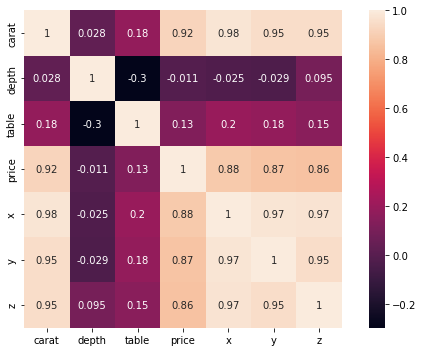

In [172]:
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

yuxarıda isə seaborn heatmap vasitəsilə datanın correlyasiya vizualını var, burada bütün sütunların bir birindən asılılığını 
-1 və 1 aralığında görmək olar, əgər  asılılıq mənfidirsə tərs asılılıq əksi halda düz asılılıq mövcuddur deməkdir. 

visualdan göründüyü kimi carat ilə price, x,y,z sütunlarının yüksət düz asılılığı var yəni carat nə qədər böyükdürsə 
price da o qədər yüksəkdir. Depth və table arasında ən böyük mənfi əlaqənin də mövcud olduğunu görə bilərik. 

Ümumiyyətlə table və depth sütunlarının digərlərinə nisbətən correliyasiyaları sıfıra çox yaxın mənfi və ya müsbət rəqəmlərdir.

Bunun səbəbi table və depth ölçülərinin bir birindən asılı olması və onların özlərinəməxsus ideal ölçü dərəcələrinin olmasıdır. 
yəni onların bir biri ilə ən ideal dərəcədə olması çox önəmlidir nəinki ayrı ayrılıqda price və ya carat sütunu ilə 
correliyasiya dərəcəsi yüksək olsun.

bu qayda ilə bütün sütunları bir biri ilə correliyasiya dərəcələrini müqayisə etmək olar.



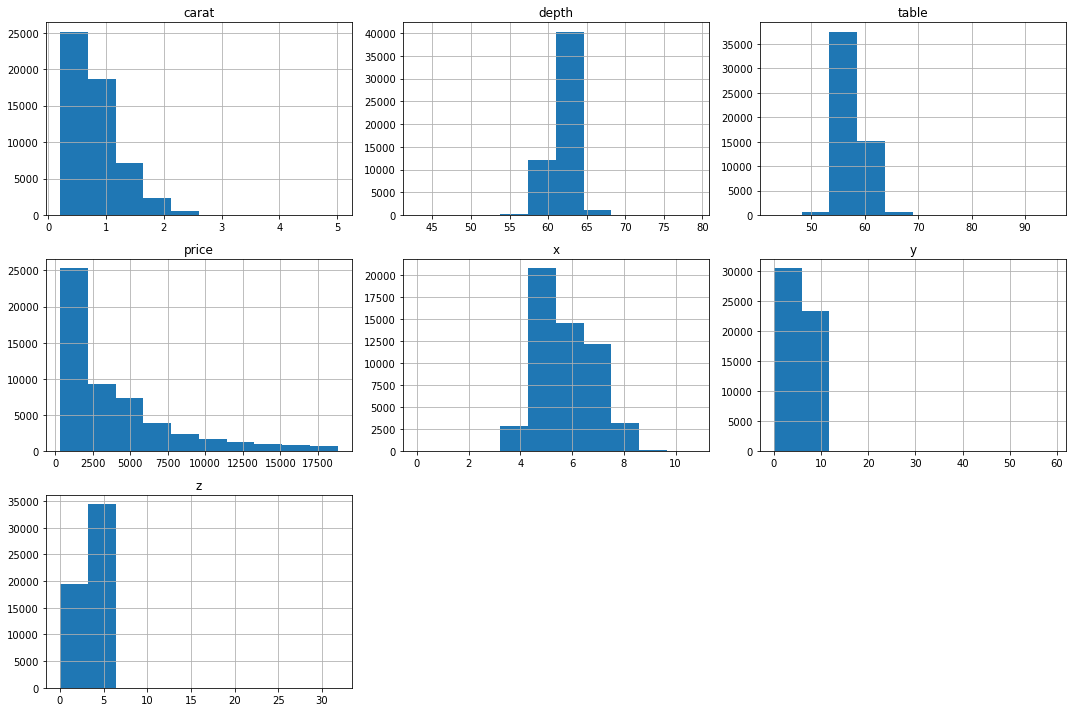

In [171]:
hist = df.hist(bins=10, figsize=(15, 10))

histogram vasitəsilə rəqəmlərdən ibarət bütün sütunların paylanmasını visual olaraq görmək mümkündür.
ilkin baxışda caratın daha çox sıfır və iki arasında paylandığını gprə bilərik və ya price sütununda  daha çox 2500də diamond sayı çoxdur və getdikcə sürətlə azalır. ancaq bar char vasitəsilə visualizasiyə çoxda yaxşı olmaya bilər, bunuları seaborn kdeplot vasitəsilə daha aydın visuallaşdıra bilərik.

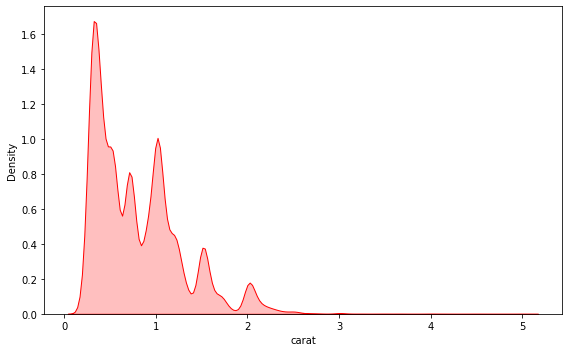

In [86]:
sns.kdeplot(df['carat'], shade=True , color='r')
plt.rcParams["figure.figsize"] = [8, 5]

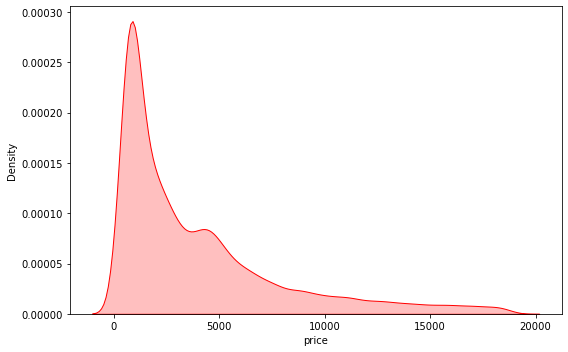

In [85]:
sns.kdeplot(df['price'], shade=True , color='r')
plt.rcParams["figure.figsize"] = [8, 5]

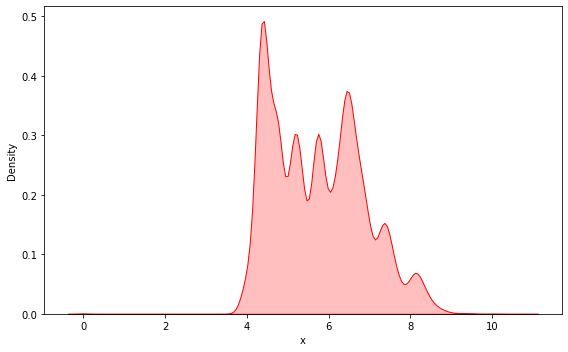

In [174]:
sns.kdeplot(df['x'], shade=True , color='r')
plt.rcParams["figure.figsize"] = [8, 5]

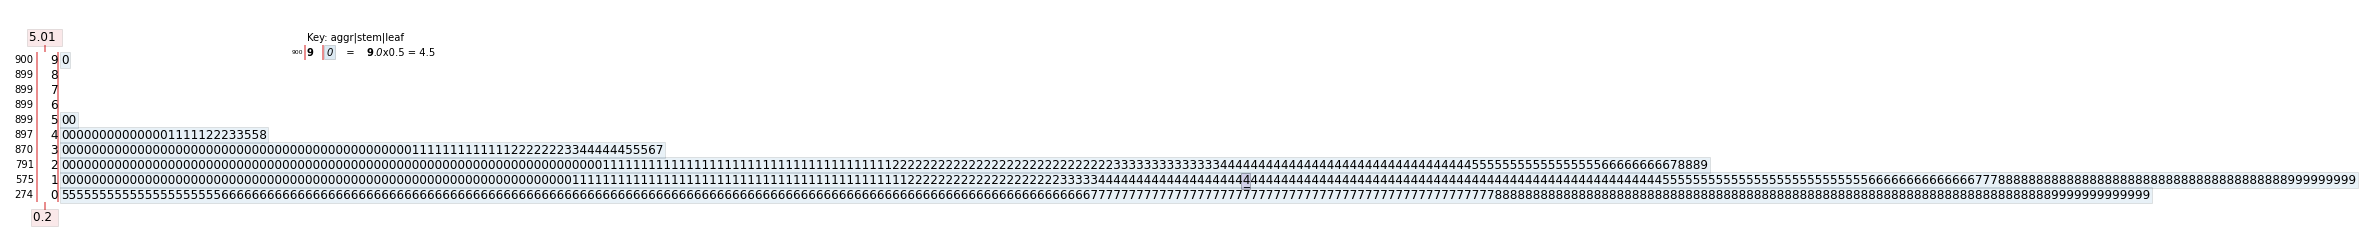

In [178]:
diamonds=df['carat']
stemgraphic.stem_graphic(diamonds, scale=0.5)
plt.show()

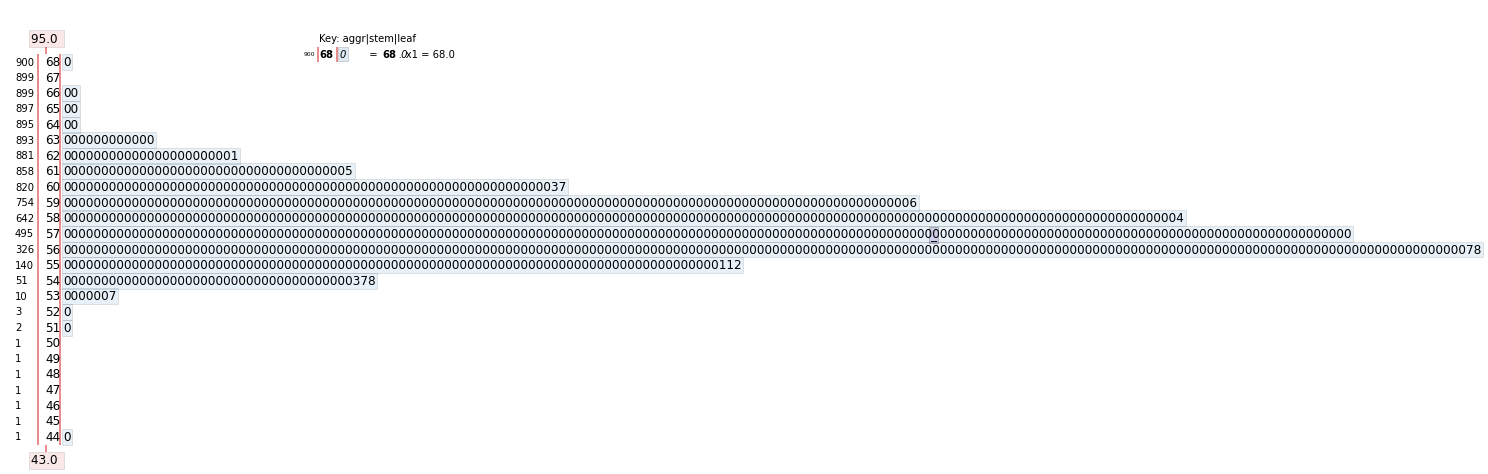

In [105]:
diamonds=df['table']
stemgraphic.stem_graphic(diamonds, scale=1)
plt.show()

## One sample t-test

aşağıda biz hər bir sütunun yuxarıda olduğu kimi dağılımlarını görə bilərk və bundan əlavə normal distribution olub olmadığını
yoxlaya bilərik. aşağıdakılardan göründüyü kimi heç bir stunun paylanması normal deyil.

In [ ]:
price= df['price']

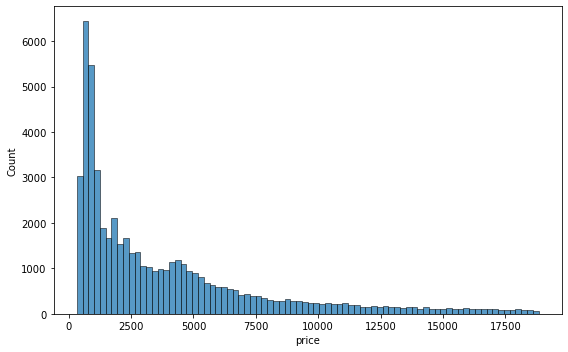

In [146]:
sns.histplot(price)
plt.show()

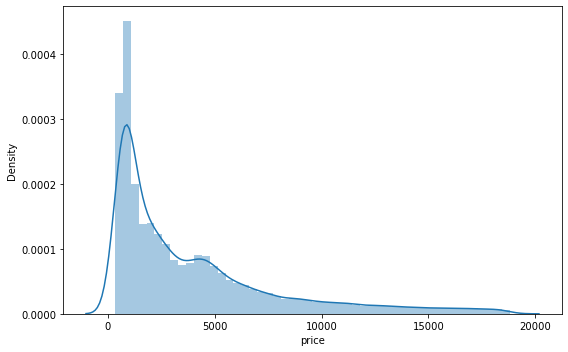

In [147]:
sns.distplot(price)
plt.show()

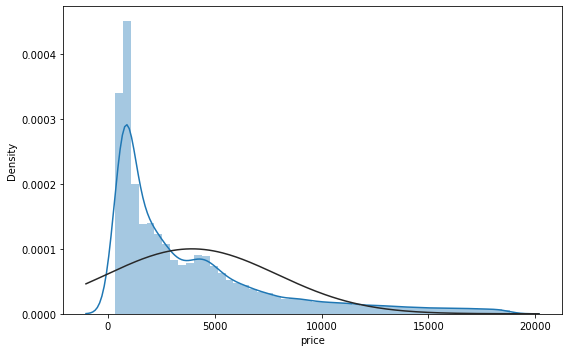

In [148]:
sns.distplot(price, fit=stats.norm)
plt.show()

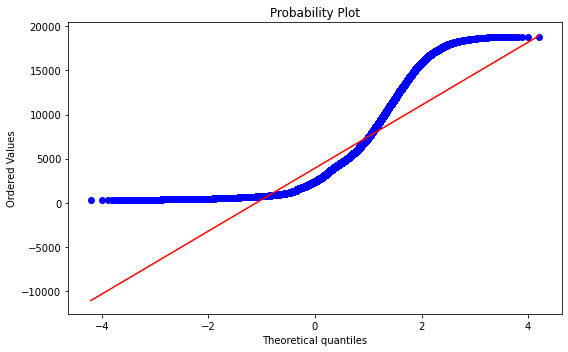

In [149]:
stats.probplot(price, dist='norm', plot=pylab)
pylab.show()

In [150]:
carat = df['carat']

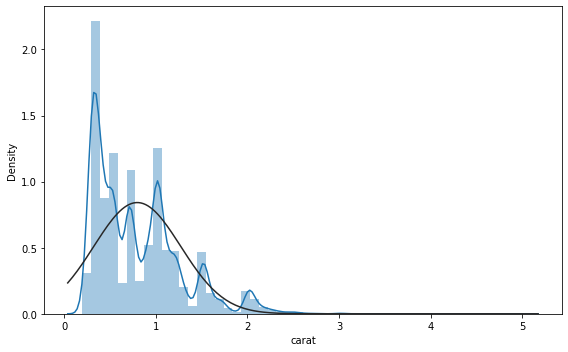

In [152]:
sns.distplot(carat, fit=stats.norm)
plt.show()

In [153]:
x= df['x']

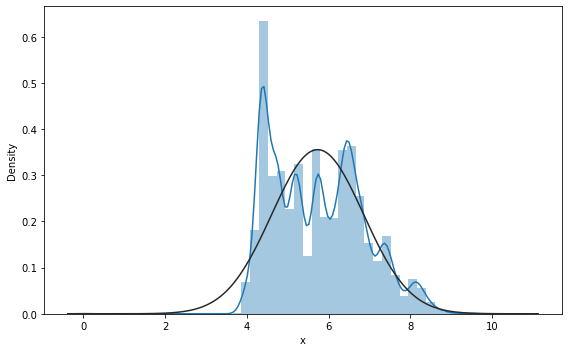

In [154]:
sns.distplot(x, fit=stats.norm)
plt.show()

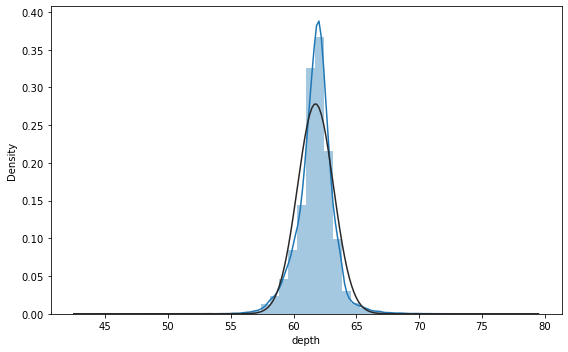

In [156]:
depth = df['depth']
sns.distplot(depth, fit=stats.norm)
plt.show()

In [159]:
print(stats.shapiro(depth))

ShapiroResult(statistic=0.9534217119216919, pvalue=0.0)


In [161]:
print(stats.shapiro(price))

ShapiroResult(statistic=0.7981084585189819, pvalue=0.0)


In [162]:
print(stats.shapiro(carat))

ShapiroResult(statistic=0.893942654132843, pvalue=0.0)


In [180]:
table = df['table']
print(stats.shapiro(table))

ShapiroResult(statistic=0.9541210532188416, pvalue=0.0)


In [183]:
print(len(df))

53940


Shapiro testinin müxtəlif sütunlara tətbiqi  nəticəsində pvalue 0.05 dən kiçik olduğunu görüb bir daha heç bir sütunun 
paylanması normal olmadığını deyə bikrik.
ancaq datamızın sayı 120 dən çox olduğu üçün t test tətbiq edə bilərik.


ilk öncə price sütunu üzrə t testini tətbiq etməyə çalışaq

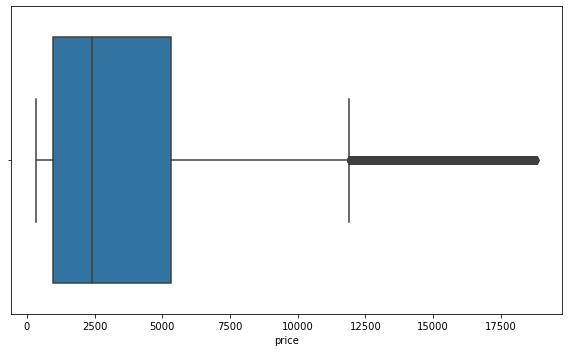

In [163]:
sns.boxplot(price)
plt.show()

burada ilk öncə null hypothesis i 5000ə bərabər olub olmadığını yoxlayaq.

H0 (null hypothesis): mu=5000                             

H1 (alternative hypotesis): mu!=5000

In [195]:
t_statistic, p_value=stats.ttest_1samp(price, 5000, alternative='two-sided')
print(f't statistic: {t_statistic}')

t_c=stats.t.ppf(q=1-.05/2,df=len(price)-1)
print(f't critic: {t_c}')

t statistic: -62.12830303471892
t critic: 1.9600079661407281


nəticədə t statistik dəyər t critic dəyərdən kiçik olduğu üçün H0 reject edilir, yəni mu 5000ə bərabər deyil.

bu haldsa mu 5000dən böyük və ya kiçik ola bilər.
növbəti testlə yoxlayaq.

H0 (null hypothesis): mu5000

H1 (alternative hypotesis): mu<5000

In [191]:
t_statistic, p_value=stats.ttest_1samp(price, 5000, alternative='less')
print(f't statistic: {t_statistic}')

t_c=stats.t.ppf(q=.05,df=len(price)-1)
print(f't critic: {t_c}')

t statistic: -62.12830303471892
t critic: -1.6448818772986744


burada da t statistic t critic dəyərdən kiçik olduğu üçün H0 reject edilir, yəni alternativ hipotezə görə mu 5000dən kiçikdir. 

son olaraq bu datada pvalue bütün sütunlar üzrə o.o5 dən kiçikdir və sütunların paylanması normal deyil 
amma sətir sayı 120dən böyük olduğu üçün t test tətbiq etdik. Bu səbəbdən də Wilcoxon Rank Sum test tətbiq etmədik.


In [193]:
confidence_interval = stats.t.interval( alpha=0.95, df=len(price)-1, loc=np.mean(price), scale=stats.sem(price) )
print(confidence_interval)

(3899.131957877436, 3966.4674859490383)


## Scatter plot-correlation

Text(0, 0.5, 'carat')

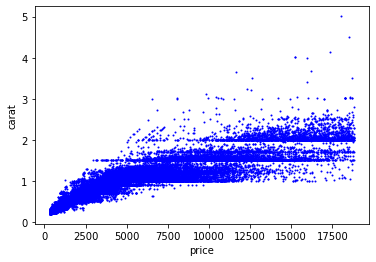

In [9]:
plt.plot(df.price, df.carat,'o',markersize=1, color='blue')
plt.xlabel('price')
plt.ylabel('carat')

1) sütunların bir biri ilə correlyasiya dərəcələrini scatter plot vasitəsilə də ölçmək olar. price və carat sütunlarının 
qrafikinə əsasən qiymət artsada almazın carat dəyəri aşağıdan başlayır və daha çox 1 və 3 carat arasında olur. 


2) aşağıdakı ikinci şəkildə isə  ən yüksək correlyasiya carat və x sütunları arasındadır 0.98, yəni almazın x ölçüsü və 
carat dəyəri arasında müsbət tənasüblük var, amma bu müsbət tənasüblük x ölçüsü üçün getdikcə azalır.


3) sonda isə price və depth sütunları arasında demək olar ki heç bir əlaqə olmadığını görə bilərik.

Text(0, 0.5, 'x')

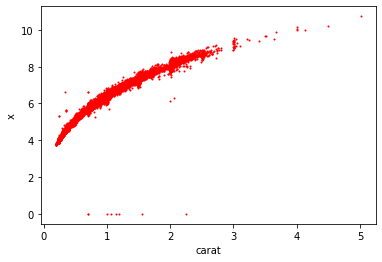

In [10]:
plt.plot(df.carat, df.x,'o',markersize=1, color='red')
plt.xlabel('carat')
plt.ylabel('x')

Text(0, 0.5, 'depth')

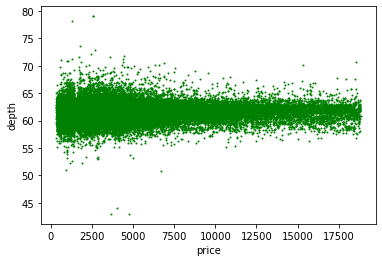

In [16]:
plt.plot(df.price, df.depth,'o',markersize=1, color='green')
plt.xlabel('price')
plt.ylabel('depth')

## Two sample t-test

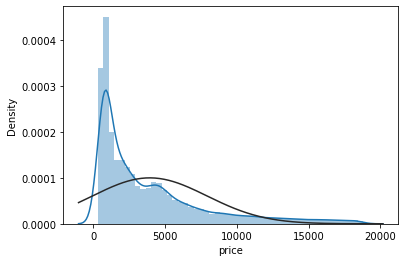

In [11]:
price = df['price']
sns.distplot(price, fit=stats.norm)
plt.show()

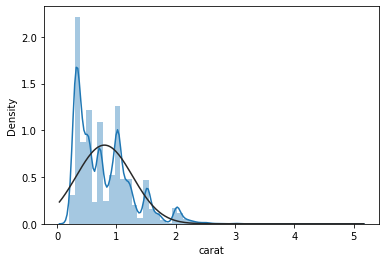

In [12]:
carat = df['carat']
sns.distplot(carat, fit=stats.norm)
plt.show()

In [18]:
price = df['price']
print(stats.shapiro(price))

ShapiroResult(statistic=0.7981084585189819, pvalue=0.0)


In [19]:
carat = df['carat']
print(stats.shapiro(carat))

ShapiroResult(statistic=0.893942654132843, pvalue=0.0)


In [ ]:
burada hər iki columnda da shapiro test nəticələrinə görə pvalue 0.05dən kiçik olduğu üçün normal paylanma olmasada 
sətirlərin sayı 120dən çox olduğu  üçün t test edə bilərik.

H0 (null hypothesis): mu1-mu2=0
    
H1 (alternative hypotesis): mu1-m2!=0

In [24]:
print(stats.ttest_ind(carat, price, alternative='two-sided', equal_var=True))

print(stats.t.ppf(q=1-.05/2,df=len(carat)-1))

Ttest_indResult(statistic=-228.9060465473468, pvalue=0.0)
1.9600079661407281


pvalue 0.05 dən kiçik olduğu üçün H0 rejet edilir yəni iki qrupun meanləri bir birindən fərqlidir.

H0 (null hypothesis): mu1-mu2=0


H1 (alternative hypotesis): mu1-m2<0


In [23]:
print(stats.ttest_ind(carat, price, alternative='less'))

print(stats.t.ppf(q=.05,df=len(carat)-1))

Ttest_indResult(statistic=-228.9060465473468, pvalue=0.0)
-1.6448818772986744


alınan son nəticəyə görə H0 reject olunur və price mean ortalaması caratın mean ortalamasından böyük olduğunu göstərir.